In [2]:
from google.colab import files
up=files.upload()

Saving walmart_sales.csv to walmart_sales.csv


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("walmart_sales.csv")

In [61]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.57,211.10,8.11
1,1,2010-02-12,1641957.44,1,38.51,2.55,211.24,8.11
2,1,2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11
3,2,2010-02-05,598014.41,0,45.07,2.56,211.24,8.32
4,2,2010-02-12,563460.77,1,49.57,2.62,211.29,8.32
5,2,2010-02-19,524972.07,0,54.98,2.67,211.32,8.32
6,3,2010-02-05,461406.13,0,41.18,2.58,211.10,7.34
7,3,2010-02-12,420789.84,1,43.17,2.56,211.24,7.34
8,3,2010-02-19,415870.20,0,45.34,2.58,211.29,7.34
9,4,2010-02-05,198606.42,0,48.00,2.60,211.30,7.50


In [62]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment'],
      dtype='object')

In [63]:
print(df.head())         #Here the display width is 80

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price    CPI  Unemployment
0      1  2010-02-05    1643690.90             0        42.31        2.57 211.10          8.11
1      1  2010-02-12    1641957.44             1        38.51        2.55 211.24          8.11
2      1  2010-02-19    1611968.17             0        39.93        2.51 211.29          8.11
3      2  2010-02-05     598014.41             0        45.07        2.56 211.24          8.32
4      2  2010-02-12     563460.77             1        49.57        2.62 211.29          8.32


In [64]:
pd.set_option('display.width',100)      #Increasing the display width to Show all columns in one line Pandas tries to fit everything within this width
print(df.head())

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price    CPI  Unemployment
0      1  2010-02-05    1643690.90             0        42.31        2.57 211.10          8.11
1      1  2010-02-12    1641957.44             1        38.51        2.55 211.24          8.11
2      1  2010-02-19    1611968.17             0        39.93        2.51 211.29          8.11
3      2  2010-02-05     598014.41             0        45.07        2.56 211.24          8.32
4      2  2010-02-12     563460.77             1        49.57        2.62 211.29          8.32


In [65]:
pd.set_option('display.max_columns', None)   #None = no limit Pandas will display all columns, even if there are 50 or 100
print(df.head())

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price    CPI  Unemployment
0      1  2010-02-05    1643690.90             0        42.31        2.57 211.10          8.11
1      1  2010-02-12    1641957.44             1        38.51        2.55 211.24          8.11
2      1  2010-02-19    1611968.17             0        39.93        2.51 211.29          8.11
3      2  2010-02-05     598014.41             0        45.07        2.56 211.24          8.32
4      2  2010-02-12     563460.77             1        49.57        2.62 211.29          8.32


In [66]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         10 non-null     int64  
 1   Date          10 non-null     object 
 2   Weekly_Sales  10 non-null     float64
 3   Holiday_Flag  10 non-null     int64  
 4   Temperature   10 non-null     float64
 5   Fuel_Price    10 non-null     float64
 6   CPI           10 non-null     float64
 7   Unemployment  10 non-null     float64
dtypes: float64(5), int64(2), object(1)
memory usage: 772.0+ bytes
None


In [67]:
  # #To display values in crct format adn avoiding scientific notations of values
  #  set_option → change display behavior
  #  float_format → formatting of decimals
  #  '{:.2f}' → show 2 decimal places

pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,10.00,10.00,10.00,10.00,10.00,10.00,10.00
mean,2.20,808073.64,0.30,44.81,2.58,211.24,7.88
std,1.03,579215.23,0.48,4.97,0.04,0.08,0.44
min,1.00,198606.42,0.00,38.51,2.51,211.10,7.34
25%,1.25,430943.91,0.00,41.46,2.56,211.24,7.38
50%,2.00,544216.42,0.00,44.12,2.58,211.27,8.11
75%,3.00,1358479.73,0.75,47.34,2.60,211.29,8.27
max,4.00,1643690.90,1.00,54.98,2.67,211.32,8.32


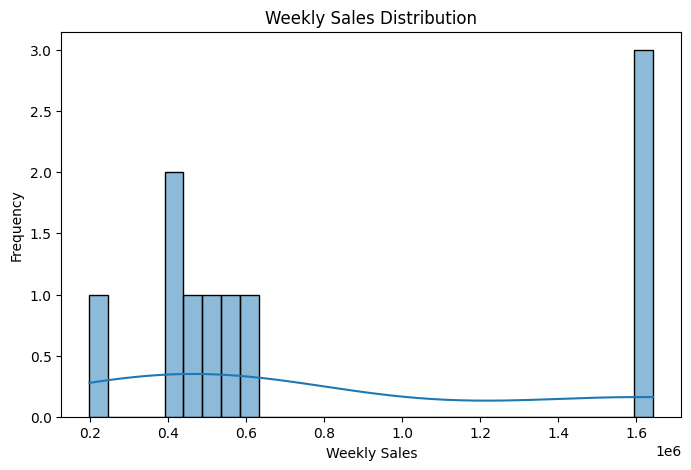

In [81]:
#Weekly Sales Distribution
#Insight: Most weekly sales are concentrated in a specific range, with some high outliers.
plt.figure(figsize=(8,5))
sns.histplot(df['Weekly_Sales'], bins=30, kde=True)
plt.title("Weekly Sales Distribution")
plt.xlabel("Weekly Sales")
plt.ylabel("Frequency")
plt.show()

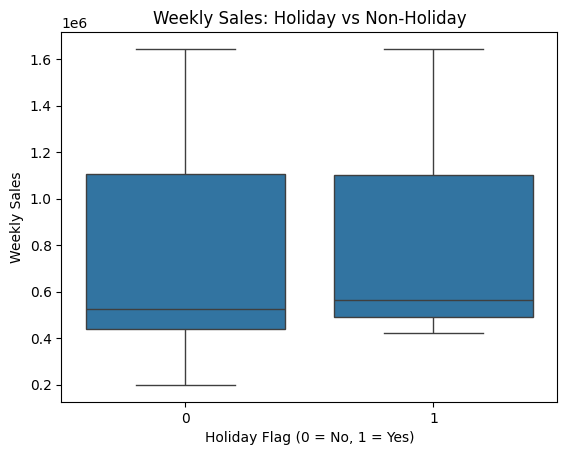

In [70]:
#Sales During Holidays vs Non-Holidays
#Insight: Holiday weeks generally have higher sales
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=df)
plt.title("Weekly Sales: Holiday vs Non-Holiday")
plt.xlabel("Holiday Flag (0 = No, 1 = Yes)")
plt.ylabel("Weekly Sales")
plt.show()

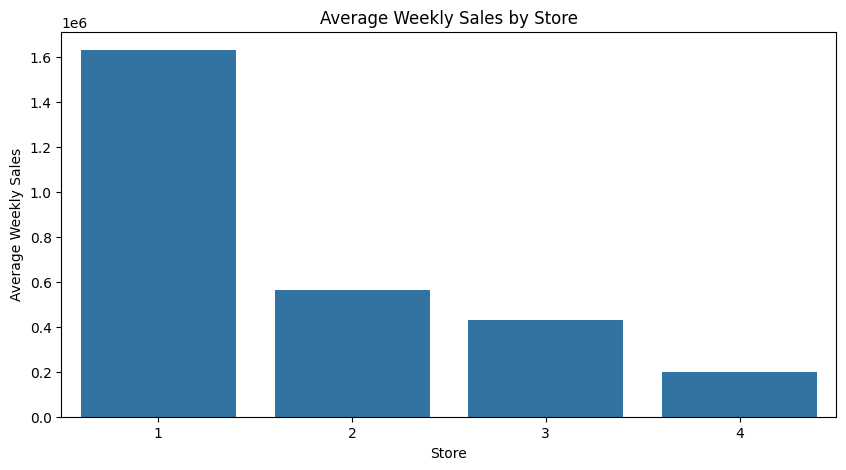

In [78]:
#Weekly Sales by Store
#Insight: Some stores consistently outperform others
plt.figure(figsize=(10,5))
sns.barplot(x='Store', y='Weekly_Sales', data=df, errorbar=None)
plt.title("Average Weekly Sales by Store")
plt.xlabel("Store")
plt.ylabel("Average Weekly Sales")
plt.show()

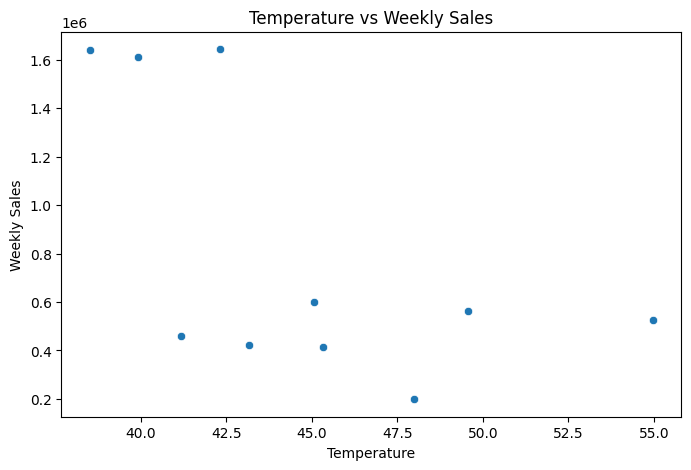

In [95]:
#Temperature vs Weekly Sales
#Insight: Temperature has weak correlation with sales
plt.figure(figsize=(8,5))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df)
plt.title("Temperature vs Weekly Sales")
plt.xlabel("Temperature")
plt.ylabel("Weekly Sales")
plt.show()

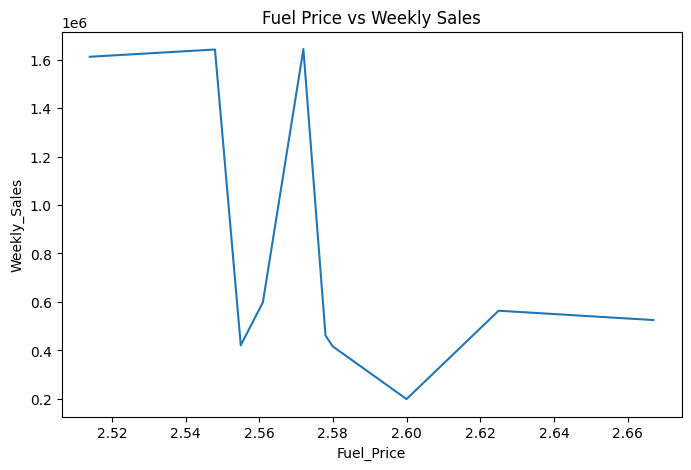

In [100]:
#Fuel Price vs Weekly Sales
# Insight: Fuel prices do not strongly affect weekly sales
plt.figure(figsize=(8,5))
sns.lineplot(x='Fuel_Price', y='Weekly_Sales', data=df)
plt.title("Fuel Price vs Weekly Sales")
plt.show()

In [104]:
#Correlation Heatmap
#Insight: Weak correlation with fuel & temperature, stronger impact from store & holidays
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


#df.corr() internally:

# Loops through all columns
# Tries to convert them to numeric
# Date column breaks this process
# Correlation ONLY works on numeric columns
# 👉 Pandas tried to convert the Date to float
# 👉 It failed
# 👉 Hence the error

ValueError: could not convert string to float: '2010-02-05'

<Figure size 800x600 with 0 Axes>

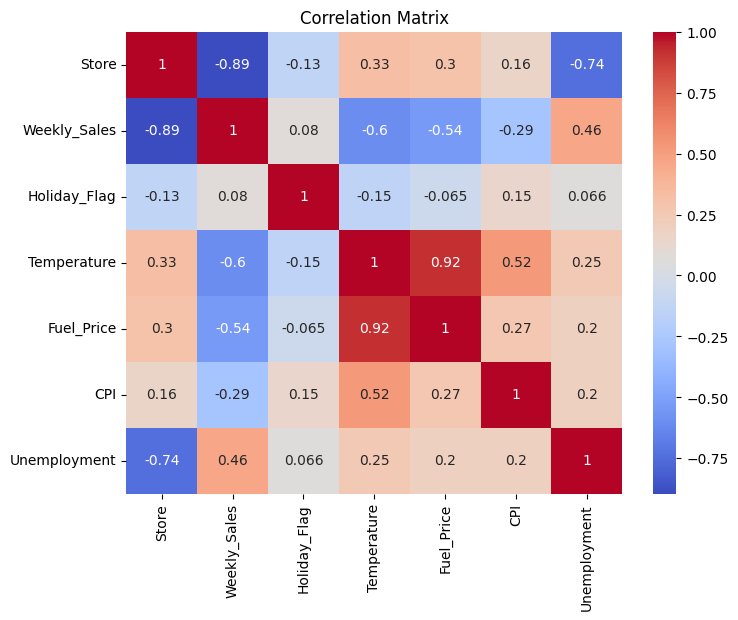

In [105]:
#solution1 (BEST & CLEANEST): Select only numeric columns
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


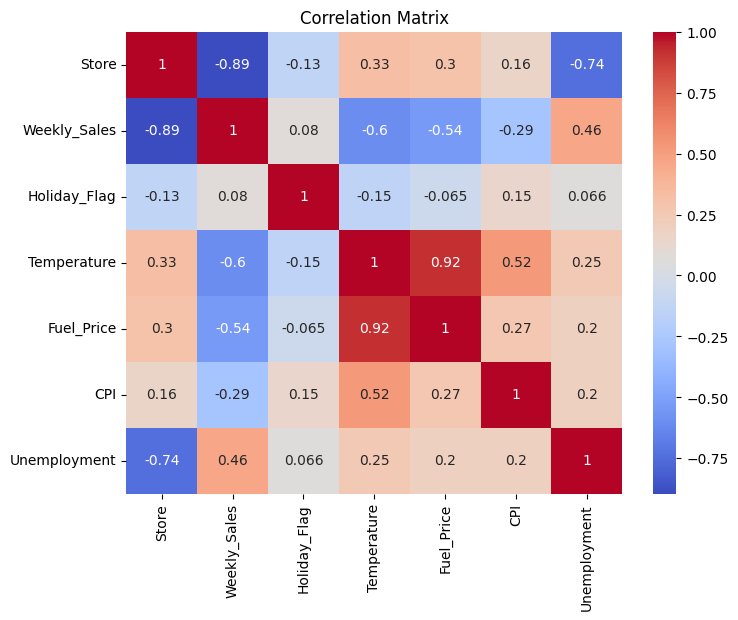

In [107]:
#Solution 2: Drop Date column explicitly
df_no_date = df.drop(columns=['Date'])
plt.figure(figsize=(8,6))
sns.heatmap(df_no_date.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


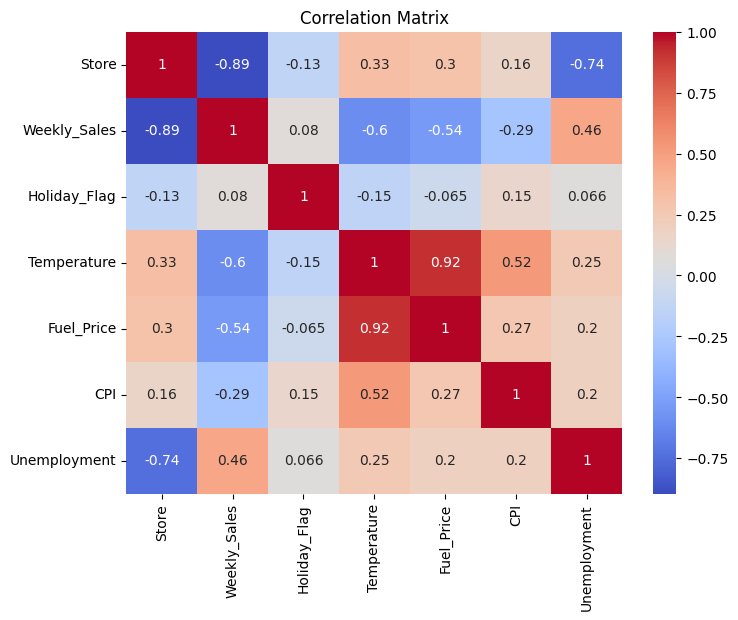

In [109]:
#Final Recommended Code
plt.figure(figsize=(8,6))
sns.heatmap(
    df.select_dtypes(include='number').corr(),
    annot=True,
    cmap="coolwarm"
    )
plt.title("Correlation Matrix")
plt.show()

In [ ]:
Final Analysis Summary :-

Holiday weeks generate higher sales
Sales vary significantly between stores
External factors like temperature and fuel price have limited impact
Economic indicators (CPI, unemployment) may influence long-term trends